<a href="https://colab.research.google.com/github/sahebsinghh/Custom-Helmet-Object-Detection/blob/main/HelmetDetectionYOLOv8AndNumberPlateExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Helmet detection using YOLOv8 and Number Plate extraction using EasyOCR

In [ ]:
#Mounting Google Drive to access files in Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/MyDrive/YOLOv8


In [ ]:
#Installing required Packages
!pip install ultralytics
!pip install easyocr
!pip install Pillow
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Training the model on custom dataset of the following labels : Helmet , No_Helmet , Motorcycle , Person.

In [ ]:
# Training the YoloV8 Small model on custom data
!yolo task=detect mode=train model=yolov8n.pt data="/content/drive/MyDrive/YOLOv8/data.yaml" epochs=20 imgsz=640 save="True" batch=2

Ultralytics YOLOv8.0.83 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLOv8/data.yaml, epochs=20, patience=50, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyna

In [ ]:
#Testing the yolov8 small model on test video using trained weights
!yolo task=detect mode=predict model="/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt" source="/content/drive/MyDrive/YOLOv8/yolov_rider.mp4" conf=0.5 save="True"

Ultralytics YOLOv8.0.83 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 55.9ms
video 1/1 (2/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 7.9ms
video 1/1 (3/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 8.7ms
video 1/1 (4/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 7.9ms
video 1/1 (5/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 8.8ms
video 1/1 (6/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 8.8ms
video 1/1 (7/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 8.5ms
video 1/1 (8/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 13.7ms
video 1/1 (9/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4:

#Importing the License Plate Dataset from Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PeQehjNRIDFud7jtPJWG")
project = rf.workspace("college-v8xsp").project("license-plates-ud6ea")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.83, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to License-plates-1 in yolov8:: 100%|██████████| 2302/2302 [24:32<00:00,  1.56it/s]


In [ ]:
#Training the YOLOv8 model on License Plate dataset for OCR
from ultralytics import YOLO

# Loading a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Using the model
results = model.train(data='/content/drive/MyDrive/YOLOv8/License-plates-1/data.yaml', epochs=20, imgsz=640, conf=0.5)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [ ]:
#Evaluating model performance on the validation set
results = model.val()

Ultralytics YOLOv8.0.83 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/License-plates-1/valid/labels.cache... 229 images, 1 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.14it/s]
                   all        229        228      0.983      0.991      0.994      0.931
Speed: 2.4ms preprocess, 5.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
##Testing the yolov8 small model on test video using trained weights
!yolo task=detect mode=predict model="/content/drive/MyDrive/YOLOv8/runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/YOLOv8/yolov_rider.mp4" conf=0.6 save_crop="True"

Ultralytics YOLOv8.0.83 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 75.9ms
video 1/1 (2/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 7.7ms
video 1/1 (3/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 13.1ms
video 1/1 (4/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 7.0ms
video 1/1 (5/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 17.6ms
video 1/1 (6/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 29.1ms
video 1/1 (7/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 18.5ms
video 1/1 (8/743) /content/drive/MyDrive/YOLOv8/yolov_rider.mp4: 384x640 (no detections), 13.9ms
video 1/1 (9/743) /content/drive/MyDrive/YOLOv8/yolov_rider.

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/YOLOv8/runs/detect/train2/weights/best.pt" source="/content/drive/MyDrive/YOLOv8/runs/detect/predict/crops/Motorcycle/yolov_rider827.jpg" conf=0.5 save_crop="True"

Ultralytics YOLOv8.0.83 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/YOLOv8/runs/detect/predict/crops/Motorcycle/yolov_rider827.jpg: 640x512 1 license_plate, 61.4ms
Speed: 0.6ms preprocess, 61.4ms inference, 91.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


#OCR using EasyOCR package

In [ ]:
#Installing Required Packages
import easyocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image
ocr=easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

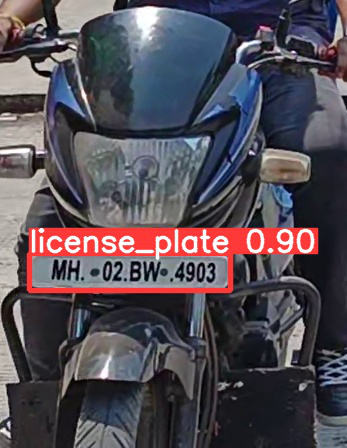

In [ ]:
#Loading and displaying model predictions on image data
from PIL import Image

# Load image
image_path = "/content/drive/MyDrive/YOLOv8/runs/detect/predict2/yolov_rider827.jpg"
image = Image.open(image_path)

# Show image
image.show()

In [ ]:
#Reducing/Eliminating redundancy in the OCR process
lst = ocr.readtext('/content/drive/MyDrive/YOLOv8/runs/detect/predict2/crops/license_plate/yolov_rider827.jpg')
text = lst[0][1]

my_list = [text]

for i in range(len(my_list)):
    my_list[i] = my_list[i].replace('*', ' ')
    my_list[i] = my_list[i].replace('.', ' ')
    my_list[i] = my_list[i].replace(':', ' ')
    my_list[i] = my_list[i].replace('!', ' ')
    my_list[i] = my_list[i].replace('@', ' ')
    my_list[i] = my_list[i].replace('#', ' ')
    my_list[i] = my_list[i].replace('$', ' ')
    my_list[i] = my_list[i].replace('%', ' ')
    my_list[i] = my_list[i].replace('^', ' ')
    my_list[i] = my_list[i].replace('&', ' ')
    my_list[i] = my_list[i].replace('*', ' ')
    my_list[i] = my_list[i].replace('(', ' ')
    my_list[i] = my_list[i].replace(')', ' ')
    my_list[i] = my_list[i].replace('-', ' ')
    my_list[i] = my_list[i].replace('=', ' ')
    my_list[i] = my_list[i].replace('/', ' ')
    my_list[i] = my_list[i].replace(',', ' ')
    my_list[i] = my_list[i].replace('+', ' ')
    my_list[i] = my_list[i].replace('-', ' ')

print(my_list)

['MH  02 BW  4903']
